In [ ]:
from keras.layers import Dense,Dropout,Activation,Add,MaxPooling2D,Conv2D,Flatten,GlobalAveragePooling2D,MaxPool2D,Conv2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras import Model
from keras.layers import BatchNormalization
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras import layers
from keras.preprocessing import image
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow import keras
import tensorflow as tf
import os

In [ ]:
tf.__version__

'2.11.0'

In [ ]:
Image_Width=128
Image_Height=128
Image_Size=(Image_Width,Image_Height)
Image_Channels=3

##Splitting the training folder into validation and training sets

In [ ]:
! pip install python_splitter 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import python_splitter
python_splitter.split_from_folder("/content/drive/MyDrive/IPDA/Training_dataset", train=0.8, val=0.2)

✅Checking SOURCE directory...
0.8 0.2 0
✅Checking percentage validation...
✅Making required directories...
✅Shuffling data...
✅Getting ready for copying files...

-------------Successfully splitted !!!--------------- 


In [ ]:
base_dir = '/content/Train_Test_Folder'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'test')

In [ ]:
# Directory with our training non-id pictures
train_dir_NonIds = os.path.join(train_dir, 'Non_Ids')
# Directory with our training id pictures
train_dir_Ids = os.path.join(train_dir, 'Ids')
# Directory with our validation non-id pictures
validation_dir_NonIds = os.path.join(validation_dir, 'Non_Ids')
# Directory with our validation id pictures
validation_dir_Ids = os.path.join(validation_dir, 'Ids')

In [ ]:
model=Sequential()
model.add(Conv2D(16,(3,3),activation='relu',input_shape=(Image_Width,Image_Height,Image_Channels)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
#model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dense(2,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

In [ ]:
from keras.optimizers import RMSprop
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(learning_rate= 0.0001),metrics=['accuracy'])

###Data augmentation

In [ ]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=Image_Size,  # All images will be resized to 128x128
        batch_size=4,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

Found 640 images belonging to 2 classes.


In [ ]:
# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=Image_Size,
        batch_size=4,
        class_mode='categorical')

Found 160 images belonging to 2 classes.


###Training

In [ ]:
#early_stopping= tf.keras.callbacks.EarlyStopping()
classification_history= model.fit(train_generator,epochs= 30,verbose= 1,validation_data= validation_generator)

Epoch 1/30
160/160 [==============================] - 72s 443ms/step - loss: 0.4223 - accuracy: 0.8734 - val_loss: 0.6372 - val_accuracy: 0.8250
Epoch 2/30
160/160 [==============================] - 78s 486ms/step - loss: 0.3825 - accuracy: 0.8813 - val_loss: 0.5014 - val_accuracy: 0.8375
Epoch 3/30
160/160 [==============================] - 78s 488ms/step - loss: 0.3139 - accuracy: 0.8938 - val_loss: 0.4467 - val_accuracy: 0.8500
Epoch 4/30
160/160 [==============================] - 82s 516ms/step - loss: 0.2915 - accuracy: 0.9062 - val_loss: 0.4196 - val_accuracy: 0.8438
Epoch 5/30
160/160 [==============================] - 77s 484ms/step - loss: 0.2967 - accuracy: 0.8938 - val_loss: 0.3926 - val_accuracy: 0.8750
Epoch 6/30
160/160 [==============================] - 68s 424ms/step - loss: 0.2912 - accuracy: 0.8938 - val_loss: 0.4022 - val_accuracy: 0.8500
Epoch 7/30
160/160 [==============================] - 78s 490ms/step - loss: 0.2620 - accuracy: 0.9094 - val_loss: 0.3459 - val_ac

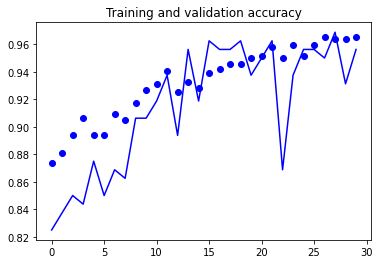

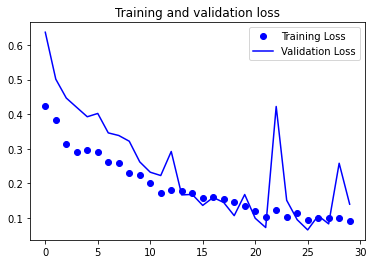

In [ ]:
import matplotlib.pyplot as plt
acc = classification_history.history['accuracy']
val_acc = classification_history.history['val_accuracy']
loss = classification_history.history['loss']
val_loss = classification_history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

##Preprocesssing the test dataset

In [ ]:
test_dir = os.path.join("/content/drive/MyDrive/IPDA/Test_dataset")

In [ ]:
test1_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=Image_Size,
        batch_size=4,
        class_mode='categorical')

Found 200 images belonging to 2 classes.


##Results on running the model on test data(data which it has not encountered with during training)

In [ ]:
model.evaluate(test_generator, use_multiprocessing= True, workers=10)

50/50 [==============================] - 23s 389ms/step - loss: 0.2342 - accuracy: 0.9250


[0.23418840765953064, 0.925000011920929]

In [ ]:
model.save("classification.h5")

In [ ]:
def import_and_predict(image_data,model):
  size= (100,100)
  
  img= np.asarray(image_data)
  img_reshape= img[np.newaxis,...]
  prediction= model.predict(img_reshape)
  return prediction

In [ ]:
predictions= import_and_predict(image, model)
classes= ['Ids','Non_Ids' ]
string= 'This image may be:'+classes[np.argmax(predictions)]